In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import lib

In [3]:
plt.rcParams["font.family"] = 'DejaVu Serif'

plt.rcParams['text.usetex'] = True

In [4]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

In [5]:
multicolor = True

In [6]:
if multicolor:
    folder_result = 'results'
else:
    folder_result = 'results_gray'

In [7]:
if multicolor:
    color = ['orange', 'green', 'red', 'yelow', 'blue']
else:
    color = ['black', 'black', 'black', 'black', 'black']
marker = ['^', 's', 'v', 'D', 'P']

# Вычислительный эксперимент

* T = 20; K = 3; SyntheticData/3_patern/2.csv
* T = 20; K = 2; SyntheticData/2_patern/2.csv
* T = 50; K = 2; SyntheticData/simple/1.csv
* T = 40; K = 2; RealData/1.csv
* T = 40; K = 2; RealData/2.csv

---

* T = 40; K = 1; RealData/Accelerometer

In [60]:
T = 70
K = 2

# type_series_name = 'simple'
# series_name = '1'
# X_test = pd.read_csv('./SyntheticData/'+type_series_name+'/' + series_name + '.csv').values.reshape([1,-1,1])

type_series_name = 'real'
series_name = 'Accelerometer'
data = pd.read_csv('./RealData/'+series_name+'.csv')
X_test = data.values[100:1000, 2:3].reshape([1,-1,1])

List_of_x = np.arange(T, X_test[0].shape[0] - 2*T)

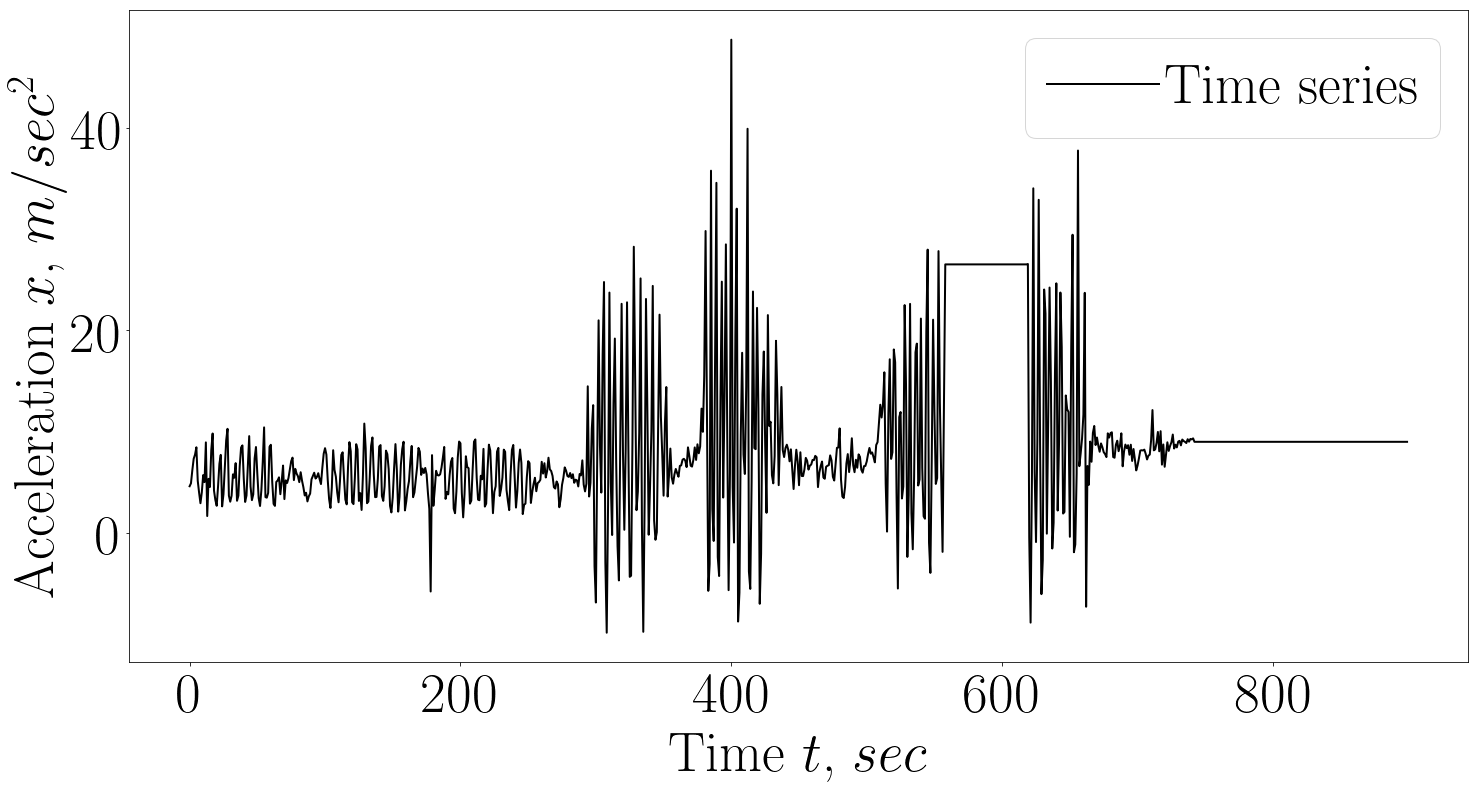

In [61]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(X_test[0], '-', color = 'black', label = 'Time series')

plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.legend(loc = 'best')
# plt.grid()
# plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_series.png', bbox_inches='tight')
plt.show()

In [62]:
phase_track = lib.return_phase_track(X_test, T)

In [63]:
phase_track.shape

(830, 70)

In [64]:
List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c = lib.local_basis(phase_track, T = T)


In [65]:
M_pairwise = lib.get_pairwise_matrix(List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c)


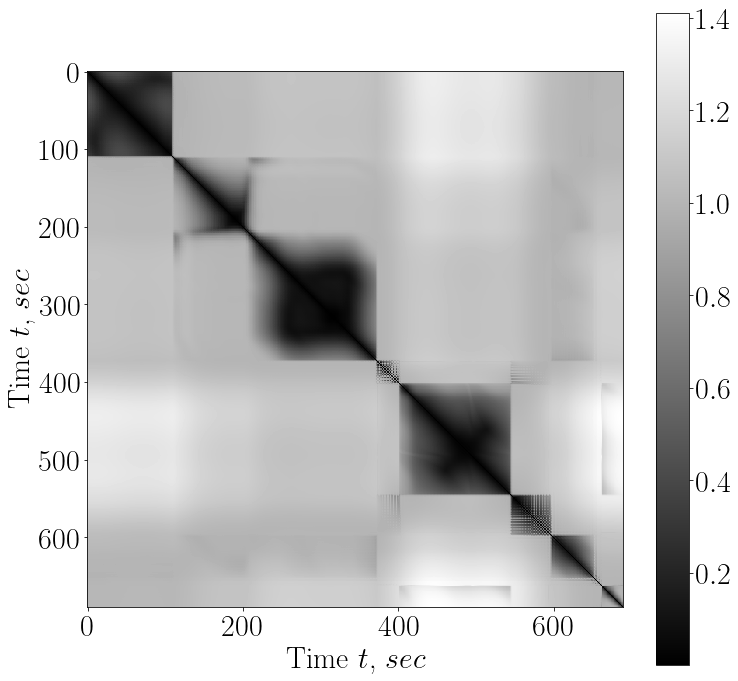

In [66]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.imshow(M_pairwise, cmap='gray')


_ = plt.colorbar()

plt.xlabel('Time $t$, $sec$')
plt.ylabel('Time $t$, $sec$')
# plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_full.png', bbox_inches='tight')
plt.show()

In [67]:
embedding = MDS(n_components=2, dissimilarity='precomputed')

resss = embedding.fit_transform(M_pairwise)

In [68]:
model = AgglomerativeClustering(n_clusters=K, affinity='precomputed', linkage='complete')

fitted = model.fit(M_pairwise)
prediction_vector = fitted.fit_predict(M_pairwise)

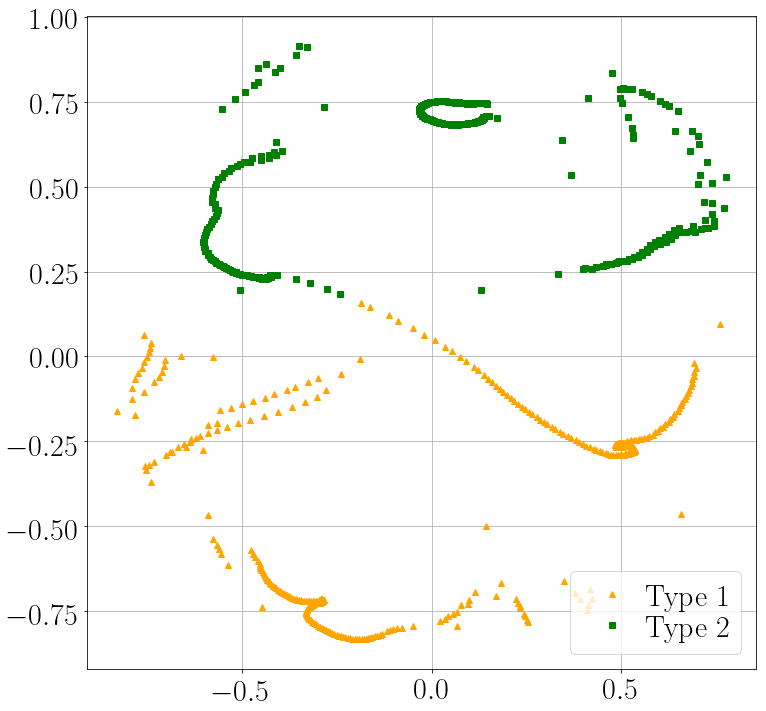

In [69]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = plt.plot(resss[:, 0][ind], resss[:, 1][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))


plt.grid()
plt.legend(loc = 'best')
# plt.xlabel('Time $t$, $sec$')
# plt.ylabel('Acceleration $x$, $m/sec^2$')
# plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_2D_vector.png', bbox_inches='tight')
plt.show()

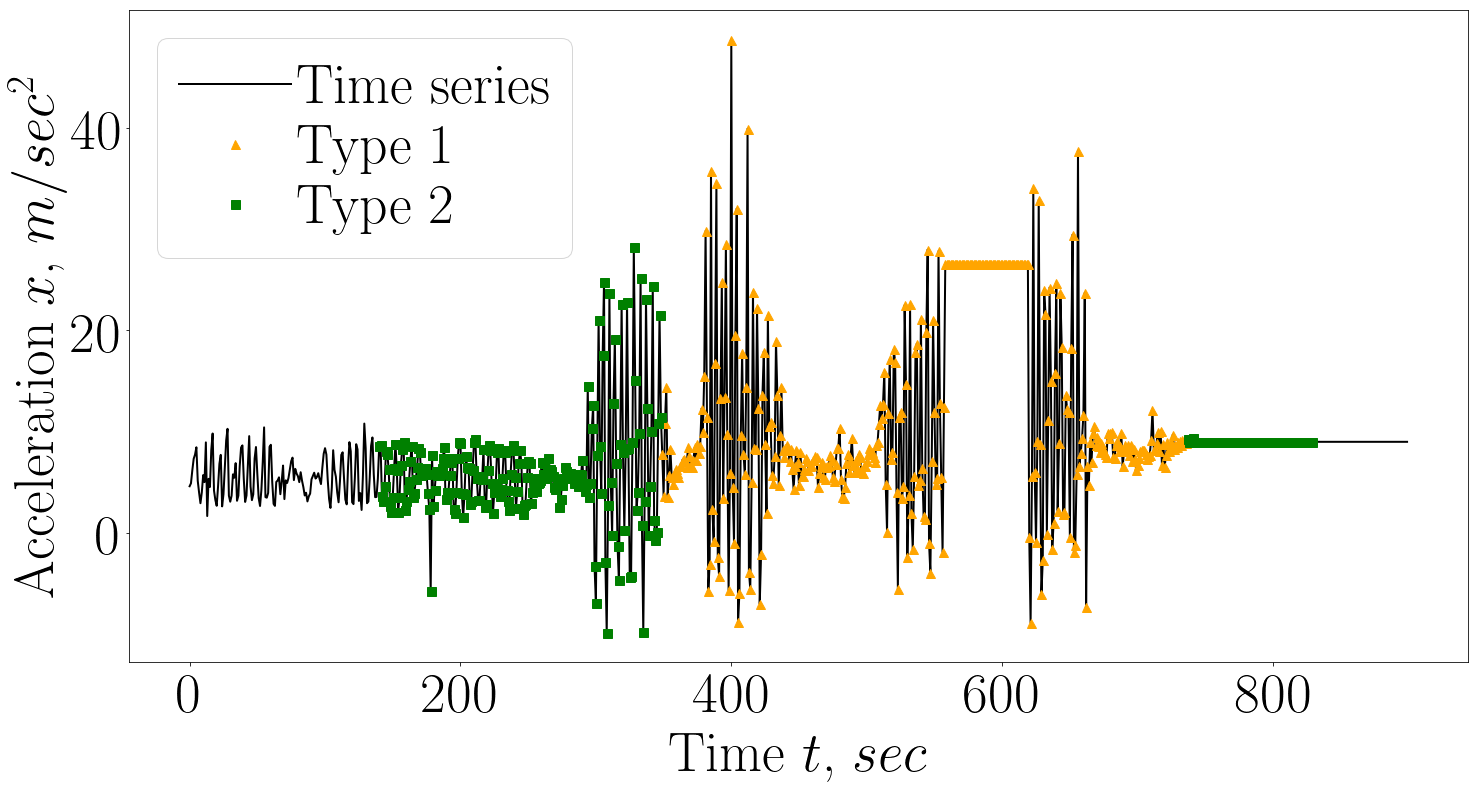

In [70]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(X_test[0], '-', color = 'black', label = 'Time series')

for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = plt.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))



# plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
# plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_claster_vector.png', bbox_inches='tight')
plt.show()

# Поиск начала сегментов

In [58]:
List_of_All, List_of_point = lib.segmentation(X_test[:, 2*T:X_test[0].shape[0]-T, :], prediction_vector, T)

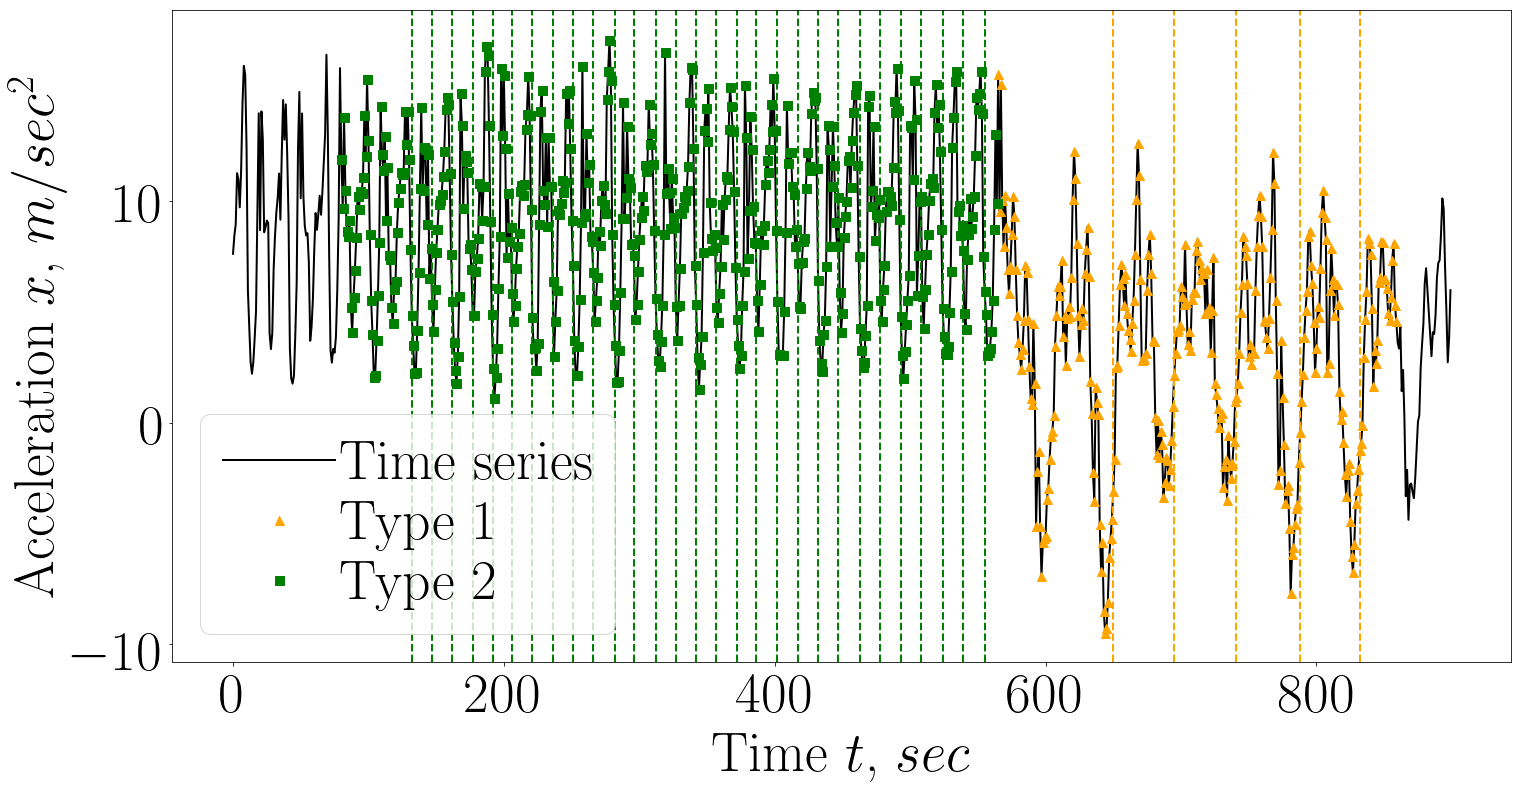

In [59]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(X_test[0], '-', color = 'black', label = 'Time series')

for t in np.unique(prediction_vector):
    ind = List_of_point[t] + T
    for x in (List_of_x + T)[ind]:
        _ = plt.axvline(x = x, linestyle = '--', color = color[t])
        
    
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = plt.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))



# plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_segmentation_vector.png', bbox_inches='tight')
plt.show()



In [60]:
index = 0

_, _, List_of_points_plus, List_of_points_minus, List_of_t_plus, List_of_t_minus, line_point, ress = List_of_All[index]


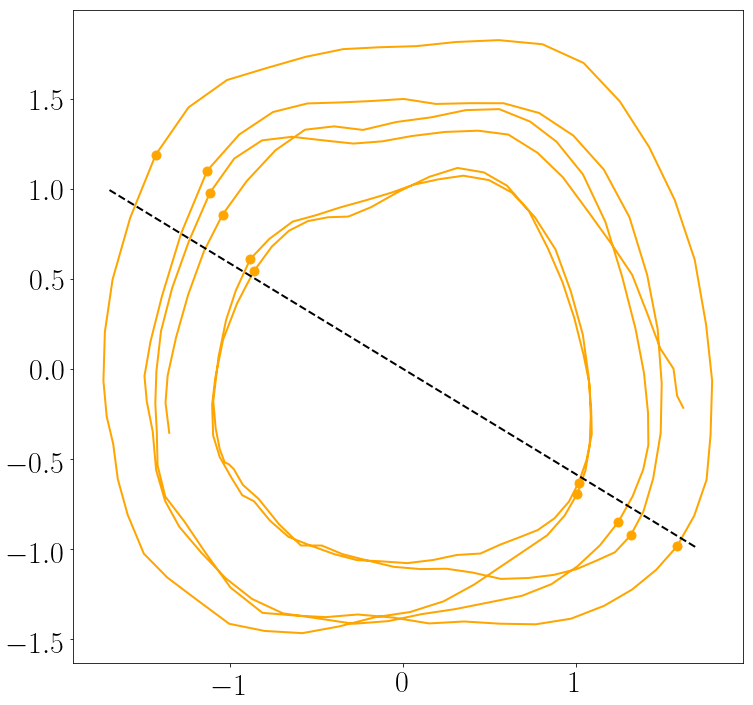

In [63]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(ress[:, 0], ress[:, 1], '-', color = color[index])

for point in List_of_points_plus:
    _ = plt.plot(point[0], point[1], 'o', color = color[index])
for point in List_of_points_minus:
    _ = plt.plot(point[0], point[1], 'o', color = color[index])

x_line = np.array([-1.7, 1.7])
k = line_point[1]/line_point[0]
y_line = k*x_line

_ = plt.plot(x_line, y_line, '--', color = 'black')

# plt.xlabel('Time $x$, $sec$')
# plt.ylabel('Time $y$, $sec$')
plt.savefig('./' + folder_result +'/'+type_series_name+'_'+series_name+'_phase_space'+ str(index)+'.png', bbox_inches='tight')
plt.show()

# Картинка во введении

In [22]:
data = pd.read_csv('./SyntheticData/2_patern/1.csv')

# plt.plot(data.values)
# plt.show()

In [23]:
X_intro = (data.values[1150:1600]).reshape([1,-1,1])

# plt.plot(X_intro[0])
# plt.show()

In [24]:
List_of_point = [np.array([15, 54, 95, 135, 175]), np.array([219, 259, 299, 339, 379, 419])]

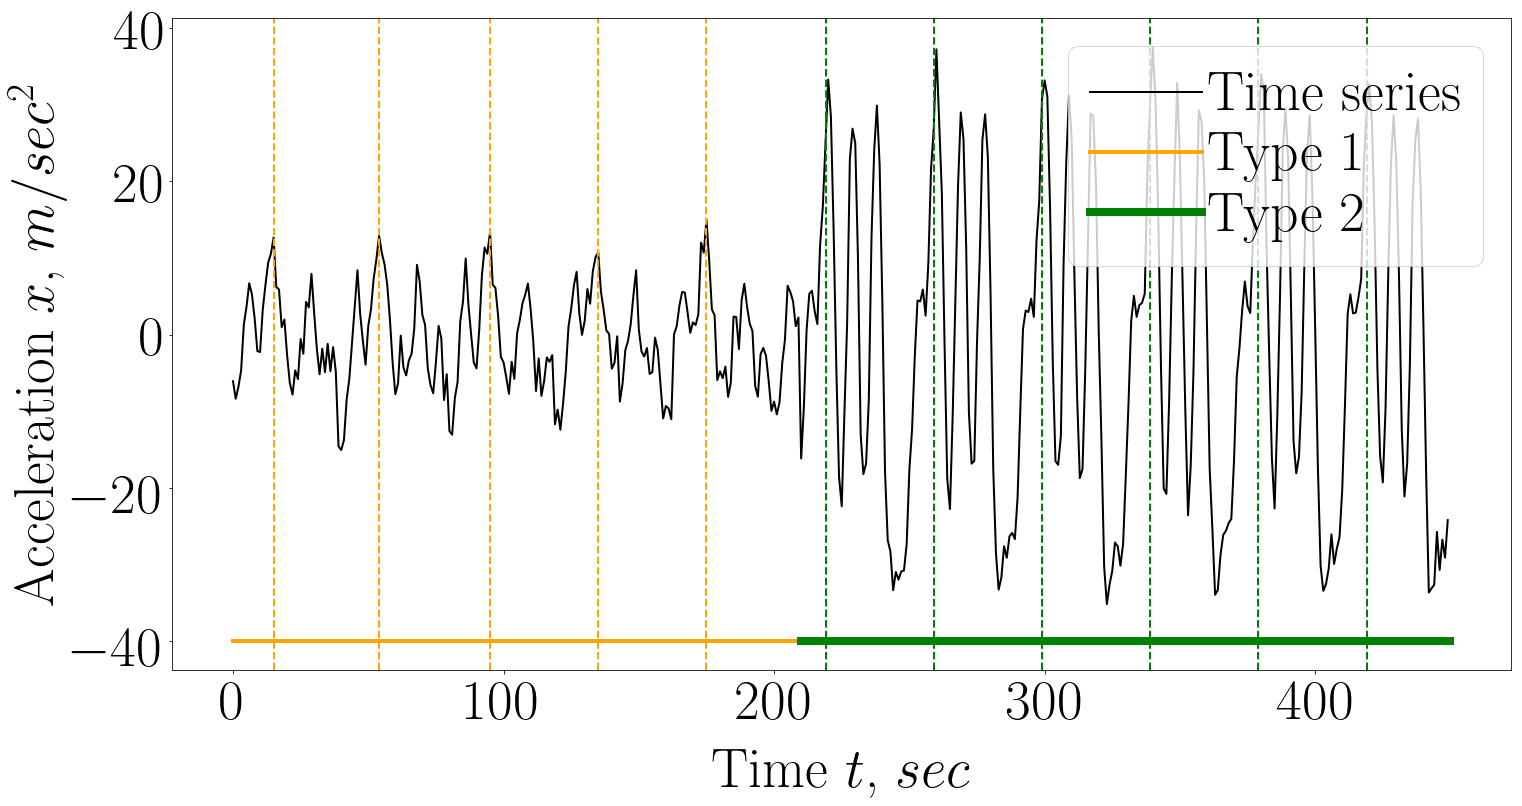

In [25]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(X_intro[0], '-', color = 'black', label = 'Time series')

list_ = [-40, -40]
_ = plt.plot([0, 210], list_, linewidth = 4, color = color[0], label = "Type 1")
# _ = plt.plot([450, 650], list_, linewidth = 4, color = color[0])
_ = plt.plot([210, 450], list_, linewidth = 8, color = color[1], label = "Type 2")

for t in [0, 1]:
    for x in List_of_point[t]:
        _ = plt.axvline(x = x, linewidth = 2, linestyle = '--', color = color[t])


plt.xlabel('time', labelpad=12)
# plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.savefig('./' + folder_result + '/example_slides.png', bbox_inches='tight')
           
plt.show()

In [26]:
phase_track_intro = lib.return_phase_track(X_intro[:, 0:100, :], 20)
model = PCA(n_components=2)
basis_a = model.fit(phase_track_intro).components_
res_a = model.transform(phase_track_intro)

phase_track_intro = lib.return_phase_track(X_intro[:, 300:400, :], 20)
model = PCA(n_components=2)
basis_b = model.fit(phase_track_intro).components_
res_b = model.transform(phase_track_intro)

In [27]:
alpha_1 = (basis_a[0]*basis_b[0]).sum()
alpha_2 = (basis_a[1]*basis_b[0]).sum()

beta_1 = (basis_a[0]*basis_b[1]).sum()
beta_2 = (basis_a[1]*basis_b[1]).sum()

a_1 = np.array([1, 0, 0])
a_2 = np.array([0, 1, 0])

b_1 = np.array([alpha_1, alpha_2, np.sqrt(1- alpha_1**2- alpha_2**2)])
b_1 = b_1/np.sqrt((b_1**2).sum())
b_2 = np.array([beta_1, beta_2, (-alpha_1*beta_1-alpha_2*beta_2)/np.sqrt(1- alpha_1**2- alpha_2**2)])
b_2 = b_2/np.sqrt((b_2**2).sum())

In [28]:
normal_1 = np.array([0,0,1])
normal_2 = np.cross(b_1, b_2)

point  = np.array([1, 1, 1])

In [29]:
ress_a = res_a[:,0].reshape([-1,1])*a_1.reshape([1,-1]) + res_a[:,1].reshape([-1,1])*a_2.reshape([1,-1])

ress_b = res_b[:,0].reshape([-1,1])*b_1.reshape([1,-1]) + res_b[:,1].reshape([-1,1])*b_2.reshape([1,-1])

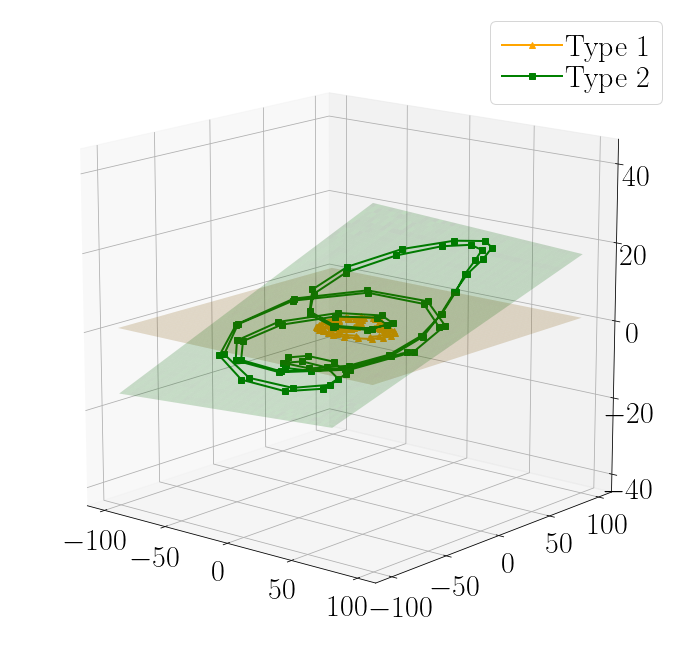

In [30]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-100, 100), range(-100, 100))

z_1 = (-normal_1[0] * xx - normal_1[1] * yy + point.dot(normal_1)) * 1./normal_1[2]
ax.plot_surface(xx, yy, z_1, alpha = 0.2,  color = color[0])
ax.plot(ress_a[:,0] , ress_a[:,1] , ress_a[:,2], "-", marker = marker[0],  color=color[0], label = 'Type 1')


z_2 = (-normal_2[0] * xx - normal_2[1] * yy +point.dot(normal_2)) * 1./normal_2[2]
ax.plot_surface(xx, yy, z_2, alpha = 0.2,  color = color[1])
ax.plot(ress_b[:, 0] , ress_b[:, 1] , ress_b[:, 2], "-", marker = marker[1],  color=color[1], label = 'Type 2')

ax.view_init(15, -50)

plt.legend(loc = 'best')

ax.xaxis.set_ticks(np.arange(-100, 101, 50))
ax.yaxis.set_ticks(np.arange(-100, 101, 50))
ax.zaxis.set_ticks(np.arange(-40, 41, 20))

plt.savefig( './' + folder_result + '/example_phase.png', bbox_inches='tight')
plt.show()